In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
df = pd.read_csv('../Dados/fifa_players.csv')
pd.set_option('display.max_columns', None)
df.head(1)

,Unnamed: 0,Counter,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,Value,Wage,Special,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Real_Face,Position,Jersey_Number,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2004-07-01,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Counter                   18207 non-null  int64  
 2   ID                        18207 non-null  int64  
 3   Name                      18207 non-null  object 
 4   Age                       18207 non-null  int64  
 5   Photo                     18207 non-null  object 
 6   Nationality               18207 non-null  object 
 7   Flag                      18207 non-null  object 
 8   Overall                   18207 non-null  int64  
 9   Potential                 18207 non-null  int64  
 10  Club                      17966 non-null  object 
 11  Club_Logo                 18207 non-null  object 
 12  Value                     18207 non-null  object 
 13  Wage                      18207 non-null  object 
 14  Specia

In [ ]:
df.drop(colums={''})

In [39]:
def f(pos):
    pos = str(pos)
    if pos == 'nan':
        return np.nan
    return pos[-2:]

df['RB'].apply(f).unique()

# Desempenho extra, varia de acordo com o jogo (escalação, moral do time, etc).
# Valor padrão determinando pelo overall rating

array(['+2', '+3', nan, '+5', '+4'], dtype=object)

In [42]:
df.columns[29:55]

Index(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

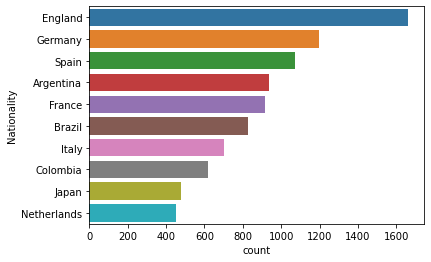

In [45]:
sns.countplot(data=df,y="Nationality", order = df.Nationality.value_counts().iloc[:10].index);

<AxesSubplot:xlabel='count', ylabel='Jersey_Number'>

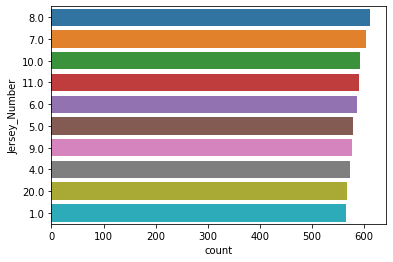

In [46]:
sns.countplot(data=df,y="Jersey_Number", order = df.Jersey_Number.value_counts().iloc[:10].index)

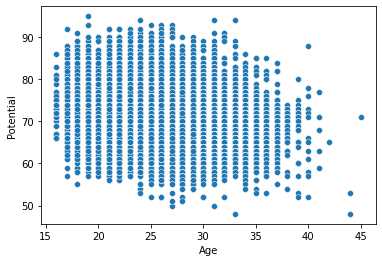

In [52]:
#df.groupby().mean
sns.scatterplot(data=df, x="Age", y="Potential");

In [53]:
df['Work_Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

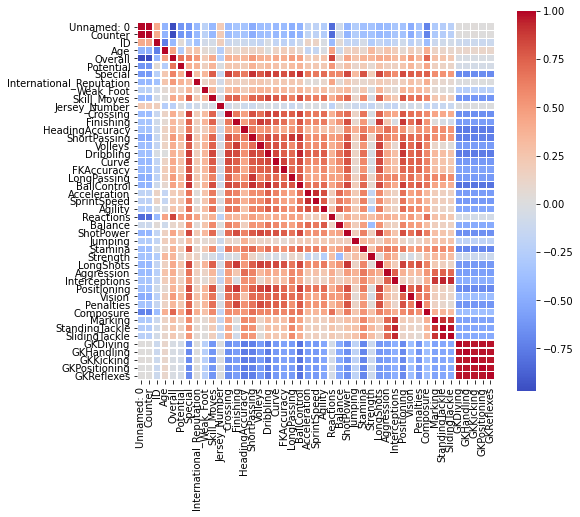

In [55]:
import matplotlib.pyplot as plt
corr = df.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);